In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import os
import pickle

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#img_array = cv2.imread('train/open_eyes/s0032_06110_0_0_1_0_0_02.png',cv2.IMREAD_GRAYSCALE)
#_ = plt.imshow(img_array,cmap='gray')

In [ ]:
#img_array.shape

#### rescaling the image as mobilenet require (224,224,3) size

In [ ]:
# #DataDirectory = 'train/' #training data
# #Classes = ['closed_eyes','open_eyes'] #list of classes
# for category in Classes:
#     path = os.path.join(DataDirectory,category)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#         backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2BGR)
#         plt.imshow(img_array , cmap='gray')
#         break
        

In [5]:
img_size = 224
# type(img_array)

In [ ]:
# new_array = cv2.resize(backtorgb,(img_size,img_size))
# plt.imshow(new_array , cmap='gray')
# plt.show()
# type(new_array)

### converting all images to (244,244)

In [2]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(DataDirectory , category)
        class_num = Classes.index(category) # 0 or 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb ,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [ ]:
#create_training_Data()

In [ ]:
# print(len(training_Data))

In [ ]:
# X = []
# y = []
# for features,label in training_Data:
#     X.append(features)
#     y.append(label)
    
# X=np.array(X).reshape(-1, img_size,img_size,3)
# X=X/255.0 #normalizing the data
# y = np.array(y)

In [ ]:
# X.shape,y.shape

### saving the data 

In [ ]:
# pickle_out = open('X.pickle','wb')
# pickle.dump(X,pickle_out)
# pickle_out.close()

# pickle_out = open('y.pickle','wb')
# pickle.dump(y,pickle_out)
# pickle_out.close()

In [ ]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

# DeepLearning - Tranfer Learning 

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

### Implementing Tranfer Learing

In [ ]:
base_input = model.layers[0].input #input
base_output = model.layers[-4].output #output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) # 1 is for describing 1 node either 0 or 1
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
my_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
my_model.summary()

# setting up for binary classification (open/close)

In [ ]:
my_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
my_model.fit(X,y, epochs=10,validation_split = 0.1) ## training the model

In [ ]:
my_model.save('my_model.h5')

# using trained model

In [6]:
model = tf.keras.models.load_model('my_model.h5')

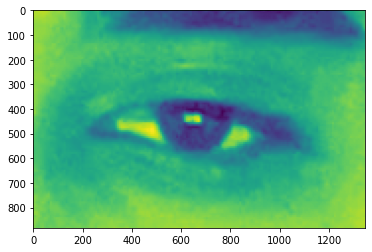

In [7]:
img_array = cv2.imread( '/home/shaswat/Drowsiness_Detection/minor project/Screenshot 2021-11-14 at 10.46.40 PM.png' , cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array)

In [7]:
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [8]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [9]:
X_input.shape

(1, 224, 224, 3)

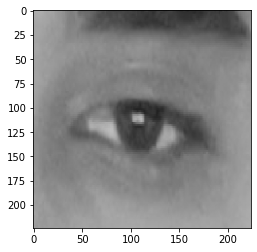

In [10]:
_ = plt.imshow(new_array)


In [11]:
X_input=X_input/255.0

In [12]:
prediction = model.predict(X_input)
print('done')
model.get_losses_for(X_input)

done


/home/shaswat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: `layer.get_losses_for` is deprecated and will be removed in a future version. Please use `layer.losses` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[]

In [13]:

if(prediction<0.5):
    print('Closed Eye')

Closed Eye


## live video demo

In [9]:
path = '/home/shaswat/Drowsiness_Detection/minor project/haarcascades/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(path)
# eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [10]:
from pygame import mixer

In [13]:
mixer.init()
sound = mixer.Sound('/home/shaswat/Drowsiness_Detection/minor project/alarm.wav')
font = cv2.FONT_HERSHEY_SIMPLEX

counter = 0

cap=cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier('/home/shaswat/Drowsiness_Detection/minor project/haarcascades/haarcascade_eye.xml')
    gray = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+h]
        cv2.rectangle(frame ,(x,y),(x+w,y+h),(0,0,255),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print('No eyes detected')
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh , ex:ex+ew]
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        print(faceCascade.empty())
        faces = faceCascade.detectMultiScale(gray,1.1,4)
        final_image = cv2.resize(eyes_roi,(224,224))
        final_image = np.expand_dims(final_image,axis = 0)  #for 4th dim
        final_image = final_image/255.0
        
    predictions = model.predict(final_image)
    
    if predictions>0.5:
        status = "open"
        cv2.putText(frame,
                   status,
                   (150,150),
                   font,3,
                   (0,255,255),
                   2,
                   cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame, (x1, y1), (x1+w1, y1+h1),(0,0,0),-1)
        
        cv2.putText(frame, 'Active',(x1+int(w1/10), y1+int(h1/10)),font,0.7,(0,255,255),2)
    else:
        counter += 1
        status = 'closed'
        cv2.putText(frame,
                   status,
                   (150,150),
                   font,3,
                   (0,255,255),
                   2,
                   cv2.LINE_4)        
        cv2.rectangle(frame, (x, y), (x+w, y+h),(0,0,0),-1)
        if(counter >= 3):
            x1,y1,w1,h1 = 0,0,175,75
            
            cv2.rectangle(frame, (x1, y1),(x1+w1, y1+h1),(0,0,0),-1)
            cv2.putText(frame,'!!!!! Sleep Alert !!!!!',
                       (x1+int(w1/10), y1+int(h1/10)),
                       font,2,
                       (0,255,255),2)
           
            sound.play(maxtime=1000) 
            counter = 0
        
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    #rect arouund face 
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,255,0),2)
        
    cv2.putText(frame,
               status,
               (50,50),
                font,3,
                (0,255,0),
                2,
               cv2.LINE_4)
    cv2.imshow('Drowsiness Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
         break
cap.release()
cv2.destroyAllWIndows()

False
No eyes detected
False
No eyes detected
False
False
False
No eyes detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
No eyes detected
False
False
False
False
False
False
No eyes detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
No eyes detected
False
No eyes detected
False
False
False
No eyes detected
False
No eyes detected
False
False
False
False
No eyes detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
No eyes detected
False
False
False
No eyes detected
False
False
False
No eyes detected
False
False
No eyes detected
False
False
False
False
False
False
False
False
False
False
False
False
No eyes detected
False
False
No eyes detected
False
False
No eyes detected
False
False
False
False
False
False
False
False
False
False
False
False
False
No eyes detected
False
False
False
False
Fals

AttributeError: module 'cv2' has no attribute 'destroyAllWIndows'

In [16]:
pip install pygame

     |████████████████████████████████| 21.8 MB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
x= tf.keras.optimizers

In [ ]:
x.Adam